In [4]:
import pickle

# Path to data
base_path = './Data/Neuchatel_Ti64'

# Path to the segmented data
pickle_file_path = base_path + '/segmented_data_dict_Ti64_all.pkl'  

# Load the dictionary from the pickle file
with open(pickle_file_path, 'rb') as file:
    segmented_data_dict = pickle.load(file)

print('Loaded segmented_data_dict from file.')


Loaded segmented_data_dict from file.


In [5]:
segmented_data_dict

{(90,
  1050): array([[[ 2.029419e-01,  2.398682e-01,  2.340698e-01, ...,
          -5.645752e-03, -3.509521e-03, -7.476807e-03],
         [ 1.443481e-01,  2.848816e-01,  3.842163e-01, ...,
           3.532410e-01,  3.546143e-01,  3.504944e-01]],
 
        [[ 6.208801e-01,  5.773926e-01,  4.820251e-01, ...,
          -5.950928e-03,  6.103516e-04, -6.561279e-03],
         [ 5.020142e-01,  6.663513e-01,  8.299255e-01, ...,
           2.966309e-01,  2.928162e-01,  2.833557e-01]],
 
        [[ 1.385498e-01,  1.182556e-01,  1.228333e-01, ...,
          -2.746582e-03, -4.730225e-03, -4.119873e-03],
         [ 1.393127e-01,  2.421570e-01,  3.593445e-01, ...,
           3.375244e-01,  3.372192e-01,  3.337097e-01]],
 
        ...,
 
        [[ 9.187317e-01,  7.321167e-01,  7.601929e-01, ...,
          -6.866455e-03, -6.713867e-03, -3.509521e-03],
         [ 8.341980e-01,  1.118927e+00,  1.204376e+00, ...,
           2.221680e-01,  2.212524e-01,  2.127075e-01]],
 
        [[ 2.674866e-01,  2.925

In [7]:
def print_segmented_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, tensor in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {tensor.shape}")

# Call the summary function
print_segmented_data_summary(segmented_data_dict)


Summary of Segmented Data:
Power: 90W, Speed: 1050mm/s - Tensor Size: (30, 2, 1986)
Power: 90W, Speed: 800mm/s - Tensor Size: (30, 2, 2622)
Power: 120W, Speed: 1800mm/s - Tensor Size: (30, 2, 1156)
Power: 120W, Speed: 1300mm/s - Tensor Size: (30, 2, 1607)
Power: 120W, Speed: 550mm/s - Tensor Size: (30, 2, 3840)
Power: 120W, Speed: 800mm/s - Tensor Size: (30, 2, 2628)
Power: 90W, Speed: 1300mm/s - Tensor Size: (30, 2, 1603)
Power: 105W, Speed: 1050mm/s - Tensor Size: (30, 2, 1978)
Power: 90W, Speed: 1550mm/s - Tensor Size: (31, 2, 1108)
Power: 105W, Speed: 1800mm/s - Tensor Size: (30, 2, 1176)
Power: 105W, Speed: 800mm/s - Tensor Size: (31, 2, 2620)
Power: 120W, Speed: 300mm/s - Tensor Size: (30, 2, 6922)
Power: 105W, Speed: 1300mm/s - Tensor Size: (30, 2, 1606)
Power: 120W, Speed: 1050mm/s - Tensor Size: (30, 2, 2000)
Power: 105W, Speed: 300mm/s - Tensor Size: (30, 2, 6916)
Power: 90W, Speed: 550mm/s - Tensor Size: (30, 2, 3820)
Power: 105W, Speed: 1550mm/s - Tensor Size: (30, 2, 1326)

In [8]:
import numpy as np

# New dictionary to hold the reduced tensors
reduced_data_dict = {}

for key, tensor in segmented_data_dict.items():
    # Step 1: Reduce the tensor to (1, 2, M) using the median across the first axis
    median_tensor = np.median(tensor[:,:,int(tensor.shape[-1]*0.1):int(tensor.shape[-1]*0.9)], axis=0, keepdims=True)
    
    # Step 2: Calculate the median and std along the last axis for the reduced tensor
    median_of_median = np.median(median_tensor, axis=-1, keepdims=True)
    std_dev = np.std(median_tensor, axis=-1, keepdims=True)
    
    
    # Combine the median of median and std_dev into a single tensor (1, 2, 2)
    combined_tensor = np.concatenate((median_of_median, std_dev), axis=-1)
    
    # Store in the new dictionary
    reduced_data_dict[key] = combined_tensor


In [ ]:
#plot median tensor 

In [9]:
print_segmented_data_summary(reduced_data_dict)


Summary of Segmented Data:
Power: 90W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1800mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 800mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1300mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1050mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 300mm/s - Tensor Size: (1, 2, 2)
Power: 90W, Speed: 550mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 120W, Speed: 1550mm/s - Tensor Size: (1, 2, 2)
Power: 90W, S

In [10]:
import matplotlib.pyplot as plt

def plot_power_speed_data(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        for speed in speeds:
            data = combined_data_dict[(power, speed)]
            # Data shape is (1, 2, 2), where last dim is [median, std]
            medians_channel_0.append(data[0, 0, 0])
            stds_channel_0.append(data[0, 0, 1])
            medians_channel_1.append(data[0, 1, 0])
            stds_channel_1.append(data[0, 1, 1])
        
        # Plotting
        fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
        fig.suptitle(f'Optical Data for Power = {power}W')
        
        axs[0].errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', label='Channel 0: Emission')
        axs[1].errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color='r', label='Channel 1: Reflection')
        
        axs[0].set_xlabel('Speed (mm/s)')
        axs[0].set_ylabel('Median with STD')
        axs[0].legend()
        axs[1].set_xlabel('Speed (mm/s)')
        axs[1].legend()

        plt.show()




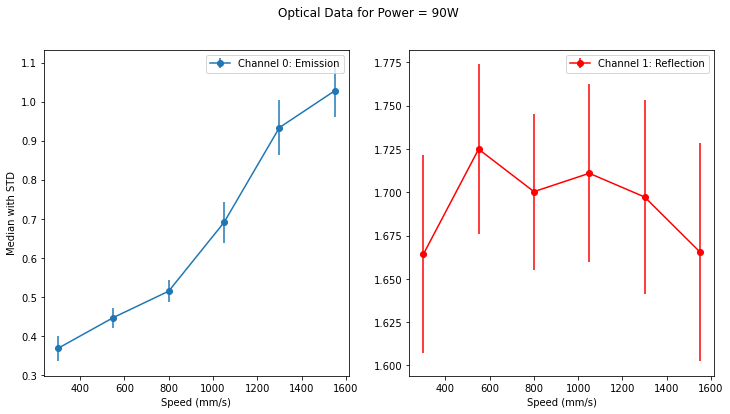

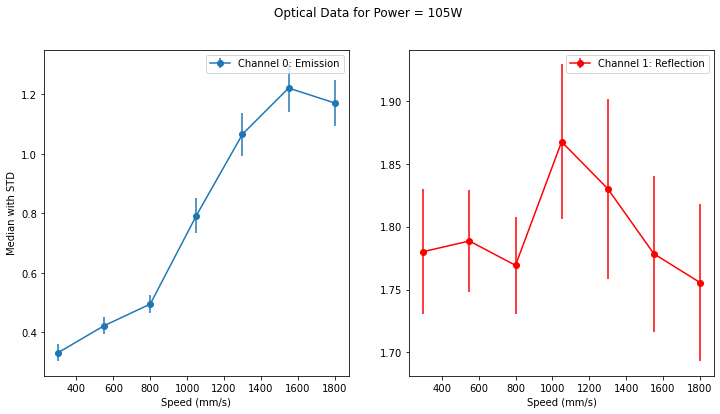

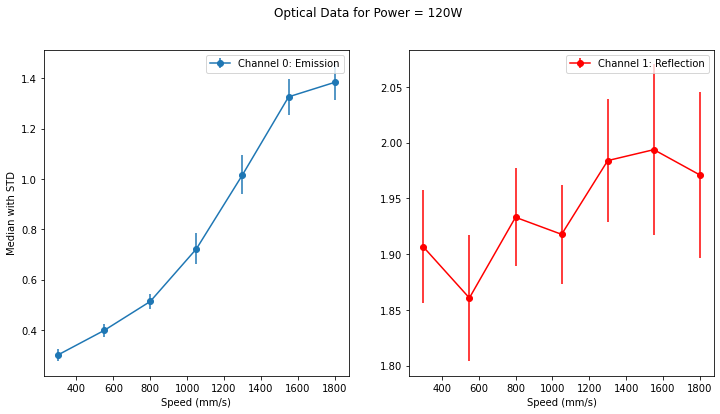

In [11]:
plot_power_speed_data(reduced_data_dict)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_speed_data(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
         # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        for speed in speeds:
            data = combined_data_dict[(power, speed)]
            # Data shape is (1, 2, 2), where last dim is [median, std]
            medians_channel_0.append(data[0, 0, 0])
            stds_channel_0.append(data[0, 0, 1])
            medians_channel_1.append(data[0, 1, 0])
            stds_channel_1.append(data[0, 1, 1])

        # Plotting with two y-axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        fig.suptitle(f'Optical Data for Power = {power}W')

        color1 = 'tab:blue'
        ax1.set_xlabel('Speed (mm/s)')
        ax1.set_ylabel('Channel 0: Emission', color=color1)
        ax1.errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', color=color1, label='Channel 0: Emission')
        ax1.tick_params(axis='y', labelcolor=color1)

        # Instantiate a second y-axis
        ax2 = ax1.twinx()
        color2 = 'tab:red'
        ax2.set_ylabel('Channel 1: Reflection', color=color2)
        ax2.errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color=color2, label='Channel 1: Reflection')
        ax2.tick_params(axis='y', labelcolor=color2)

        # Calculate derivatives
        derivatives_channel_1 = np.diff(medians_channel_1) / np.diff(speeds)

        # Find index where derivatives change sign
        change_index = np.where(np.diff(derivatives_channel_1) < 0)[0]
        if len(change_index) > 0:
            change_speed = speeds[change_index[0] + 2]  # Add 2 to account for double diff function
            ax1.axvline(x=change_speed, color='k', linestyle='--')  # Vertical line 

        # Optional: Add a legend or customize further
        fig.tight_layout()  # For layout adjustment

        plt.show()


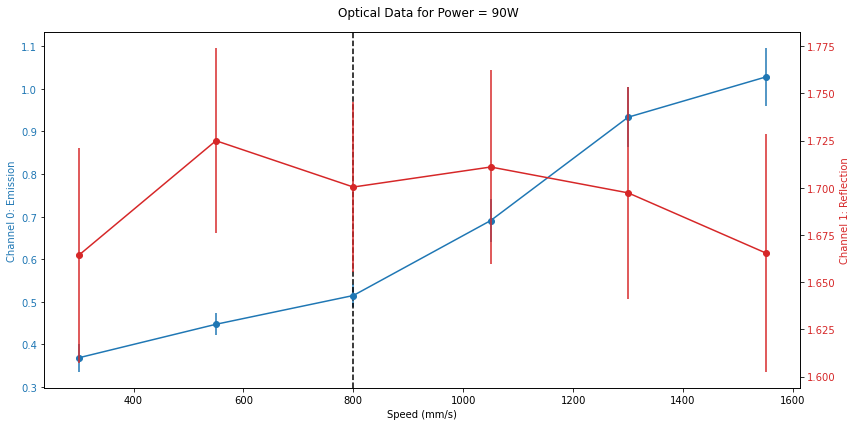

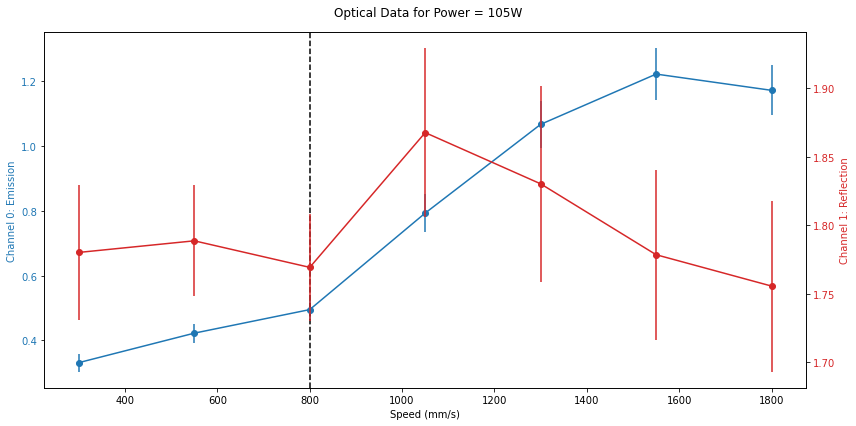

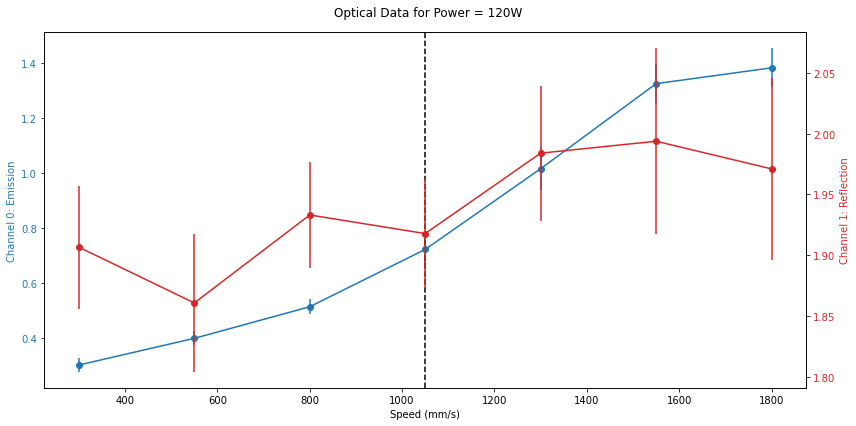

In [16]:
plot_power_speed_data(reduced_data_dict)